## Imports

In [1]:
from wcs_helper_functions import *
import numpy as np
from scipy import stats
from random import random
import pandas as pd
from sklearn.model_selection import LeaveOneOut
import matplotlib.pyplot as plt
%matplotlib inline

## Read Data

In [2]:
fociData = readFociData('./WCS_data_core/foci-exp.txt');
namingData = readNamingData('./WCS_data_core/term.txt');
cielabCoord = readClabData('./WCS_data_core/cnum-vhcm-lab-new.txt');
munsellInfo = readChipData('./WCS_data_core/chip.txt');

## Helper Functions

In [3]:
def empty_frequency_map():
    f_map = {
                "A":[0]*41,
                "B":[0]*41,
                "C":[0]*41,
                "D":[0]*41,
                "E":[0]*41,
                "F":[0]*41,
                "G":[0]*41,
                "H":[0]*41,
                "I":[0]*41,
                "J":[0]*41
    }
    return f_map

def f_map_to_matrix(f_map):
    """
    Take a frequency map (dictionary) and turn it into a matrix
    """
    matrix = [f_map["A"],
              f_map["B"],
              f_map["C"],
              f_map["D"],
              f_map["E"],
              f_map["F"],
              f_map["G"],
              f_map["H"],
              f_map["I"],
              f_map["J"]]
    # manually setting these to zero as they are achromatic
    matrix[0][0] = 0
    matrix[9][0] = 0
    return matrix
    
def frequency_hit(f_map,x,y):
    """
    f_map is a frequency map
    x is the index (number)
    y is a letter
    """    
    f_map[y][x]+=1
    return f_map

def contour_plot(f_map):
    x_size = range(0,41)
    y_size = range(0, 10)
    x, y = np.meshgrid(x_size, y_size)
    fig = plt.figure(figsize=(41, 10))
    ax = fig.add_axes([1,1,1,1]) 
    cp = ax.contour(x, y, f_map)
    ax.clabel(cp, inline=True, fontsize=10)
    ax.set_title('Contour Plot: Chip Hit Count Graph')
    ax.set_xlabel('Hue')
    ax.set_ylabel('Lightness')
    return plt

## Contour map of frequencies

In [7]:
f_map = empty_frequency_map()
# Indexing over languages
for language_index in range(1, len(fociData)):
    # Indexing over people
    for person_index in range(1, len(fociData[language_index])):
        # Incase of missing data
        if person_index not in fociData[language_index]:
            # print('Skipping fociData [',language_index,'][',person_index,']')
            continue
        # A persons foci data
        person_foci = fociData[language_index][person_index]
        for term in person_foci.values():
            for coord in term:   
                y,x = coord.split(":")
                x=int(x)
                frequency_hit(f_map,x,y)



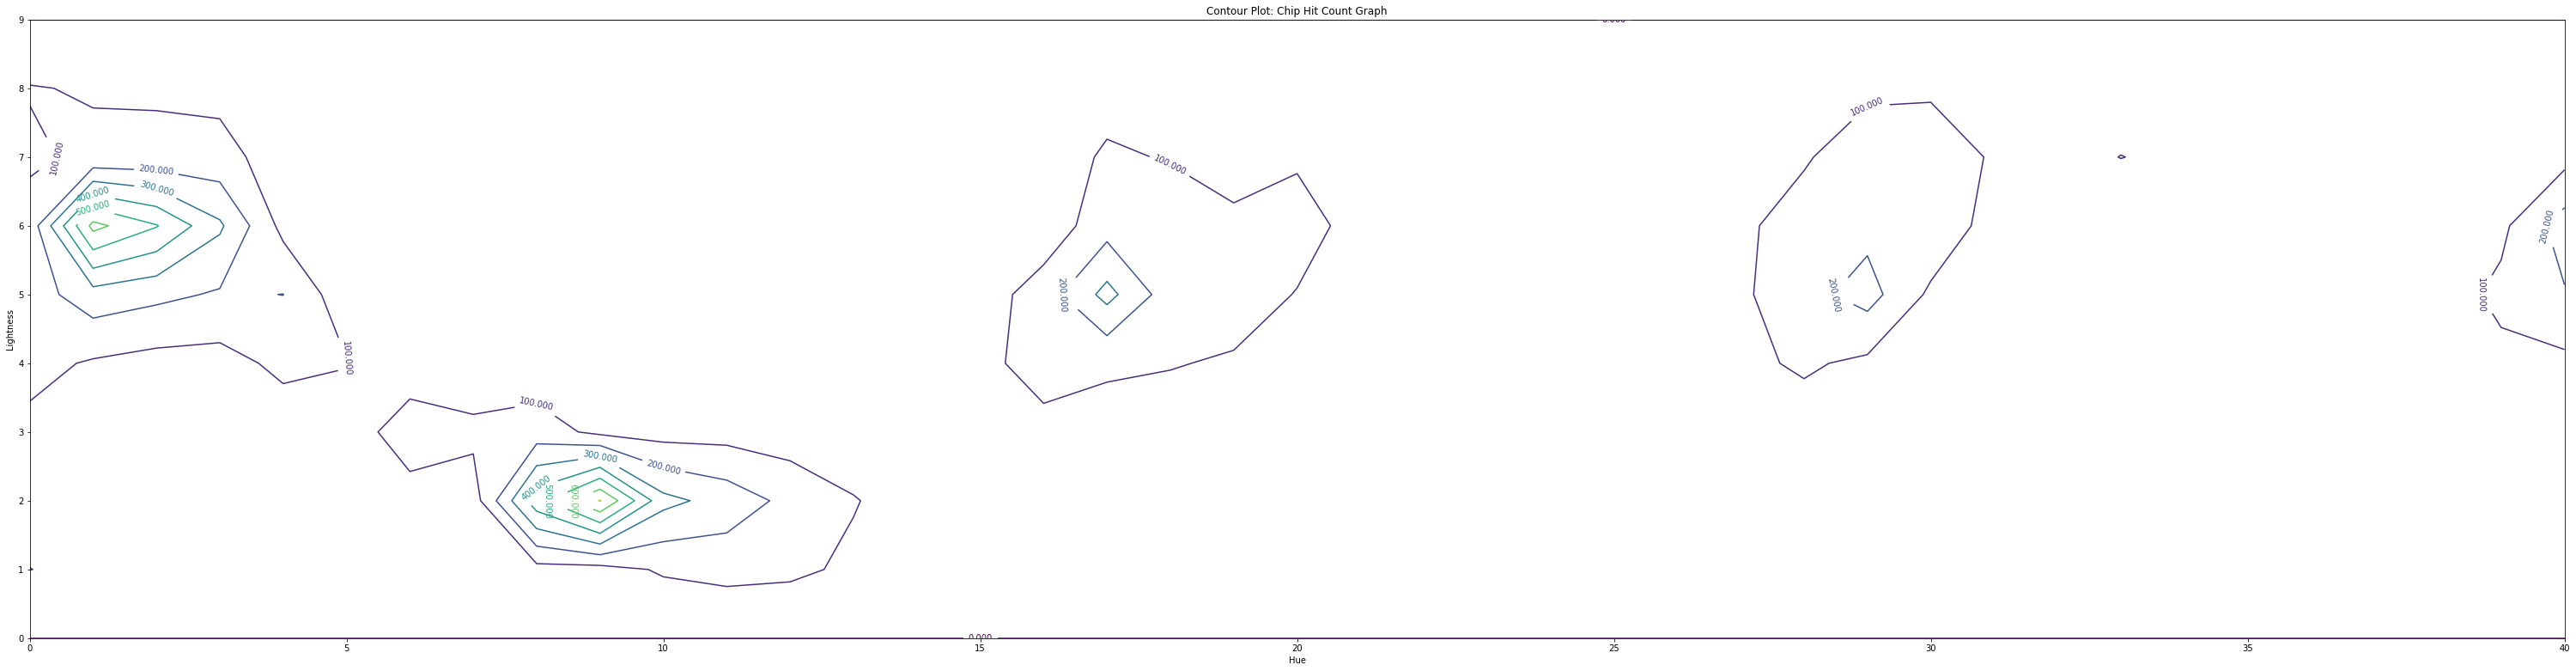

In [6]:
m = f_map_to_matrix(f_map)
graph = contour_plot(m)
graph.show()

## Prototype

In [ ]:
f_map = empty_frequency_map()
# Indexing over languages
for language_index in range(1, len(fociData)):
    # Indexing over people
    for person_index in range(1, len(fociData[language_index])):
        # Incase of missing data
        if person_index not in fociData[language_index]:
            # print('Skipping fociData [',language_index,'][',person_index,']')
            continue
        # A persons foci data
        person_foci = fociData[language_index][person_index]
        for term in person_foci.values():
            for coord in term:   
                y,x = coord.split(":")
